In [23]:
import cv2
import albumentations as A
import numpy as np

In [12]:
 # i can't downgrade the pytorch version and torchvision :(

In [18]:
import requests
from PIL import Image

# load image
url = "https://i.postimg.cc/ZKwLg2Gw/367-14.png"
image = Image.open(requests.get(url, stream=True).raw)

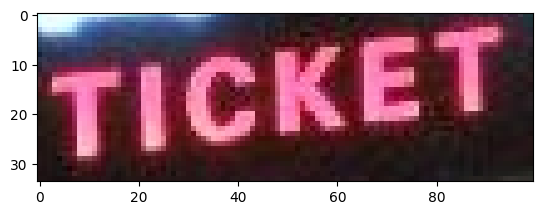

In [19]:
from matplotlib import pyplot as plt
plt.imshow(image)
plt.show()

In [32]:
def show(transformed_img_np):

  #if transformed_img_np.shape[2] == 3:  # If there are 3 channels
  #    transformed_img_np = transformed_img_np[:, :, ::-1]  # Converts BGR (OpenCV format) to RGB

  plt.imshow(transformed_img_np, cmap='gray')
  plt.axis('off')  # Hide the axis
  plt.show()


In [160]:
class Augment():
  def __init__(self):
        # Initialize any attributes if needed
        pass
  def apply_blur_transformations(self, img):
        blur_transform = A.OneOf([
            A.GaussianBlur(blur_limit=(3, 6)),
            A.MotionBlur(blur_limit=(3, 6)),
            A.MedianBlur(blur_limit=3),
        ], p=1)
        img = blur_transform(image=img)['image']
        return img

  def apply_noise_transformations(self, img):
        noise_transform = A.OneOf([
            A.GaussNoise(),

            A.MultiplicativeNoise()

        ], p=1)
        img = noise_transform(image=img)['image']
        return img

  def apply_camera_transformations(self, img):
        camera_transform = A.OneOf([
            A.RandomBrightnessContrast(),
            A.ImageCompression(quality_lower=95, quality_upper=100), # ,A.Pixelate() pixelate is not available
            #A.Downscale(scale_min=0.25, scale_max=0.25, interpolation=cv2.NEAREST)
            A.Sharpen(alpha=(0.2, 0.5), lightness=(0.5, 1.0), p=0.5),


        ], p=1)
        img = camera_transform(image=img)['image']
        return img

  def apply_Dropout_transformations(self, img):
    camera_transform = A.OneOf([
        A.PixelDropout(dropout_prob=0.01, per_channel=False, drop_value=0, mask_drop_value=None),
        A.RandomToneCurve(scale=0.1)
    ], p=1)
    img = camera_transform(image=img)['image']
    return img

  def apply_process_transformations(self, img):
    process_transform = A.OneOf([
        A.Posterize(num_bits=(4, 6), p=0.3),  # Apply Posterize with a range that is not too extreme
        A.Solarize(threshold=128, p=0.3),  # Apply Solarize only around the mid-range threshold
        A.Equalize(mode='cv', by_channels=True, p=0.3),  # Apply Equalize to adjust the image contrast
        A.Emboss(alpha=(0.2, 0.5), strength=(0.2, 0.7), p=1)
    ], p=1)  # Overall probability of applying one of these transformations
    img = process_transform(image=img)['image']
    return img

  def apply_affine_transformations(self, img):


    affine_transform = A.Affine(scale=1.1, p=1.0,
                                interpolation=cv2.INTER_LINEAR,
                                always_apply=True)
    img = affine_transform(image=img)['image']
    return img

  def apply_geometric_transformations(self, img):
        geometric_transform = A.Compose([
            A.ElasticTransform(alpha=0.05, sigma=1.5, alpha_affine=2),
            A.Affine(scale=0.95, rotate=(-10, 10)),  # Shrink and Rotate
            A.Perspective(scale=(0.01, 0.025), keep_size=True)
        ], p=1)
        img = geometric_transform(image=img)['image']
        return img



gray_image = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2GRAY)
aug = Augment()


In [56]:
def apply_and_plot_transformations(transform_function, image, iterations=8):
    """
    Applies a transformation function to an image multiple times and plots the results.

    Parameters:
    transform_function (function): The transformation function to apply.
    image (numpy.ndarray): The image to which the transformations will be applied.
    iterations (int): The number of times to apply the transformation and plot.
    """
    plt.figure(figsize=(iterations * 4, 4))  # Set the width of the figure to be large enough to accommodate all subplots in a row

    for i in range(iterations):
        # Apply the transformation function
        transformed_img = transform_function(image)

        # Display the augmented image
        plt.subplot(1, iterations, i + 1)  # Arrange subplots in a row
        plt.imshow(transformed_img, cmap='gray', aspect='equal')  # 'aspect=equal' to keep the original aspect ratio
        plt.title(f"Iteration {i+1}")
        plt.axis('off')  # Hide the axes

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()


### Blur

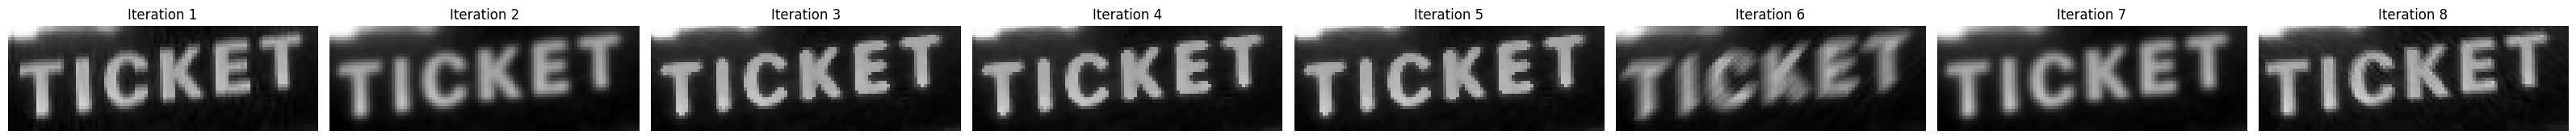

In [50]:
apply_and_plot_transformations(aug.apply_blur_transformations, gray_image, iterations=8)


### Noise

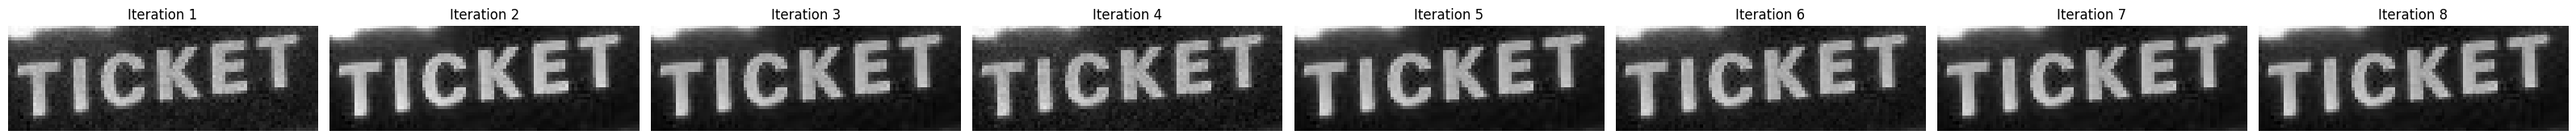

In [51]:
apply_and_plot_transformations(aug.apply_noise_transformations, gray_image, iterations=8)

### Camera

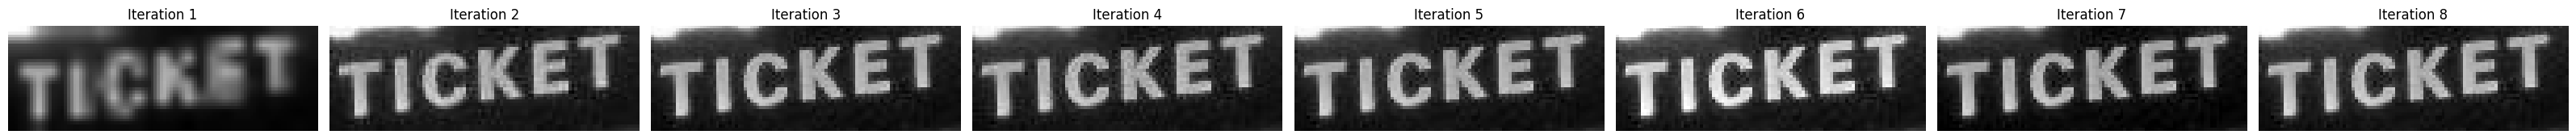

In [67]:
#apply_and_plot_transformations(aug.apply_camera_transformations, gray_image, iterations=8)

Downscale function ruins too much the text.

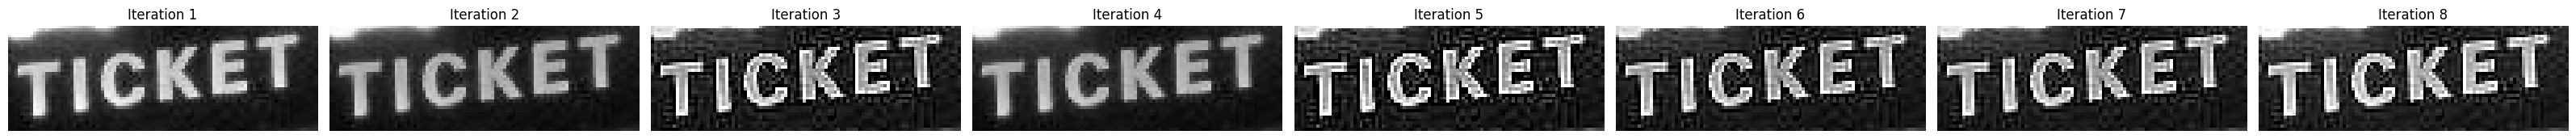

In [109]:
apply_and_plot_transformations(aug.apply_camera_transformations, gray_image, iterations=8)

Dropout

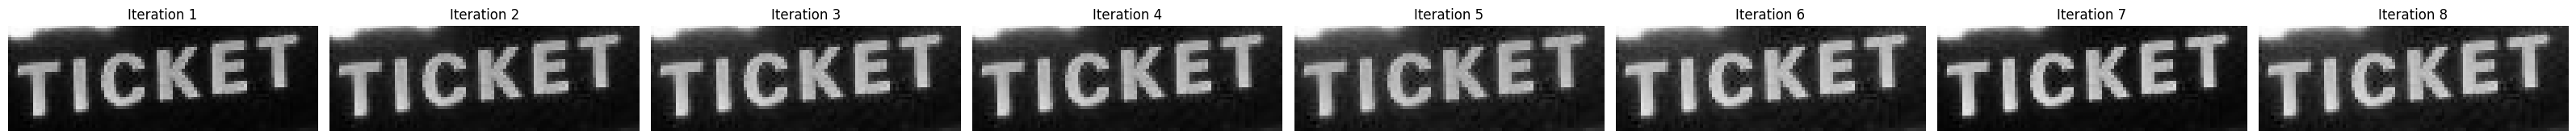

In [98]:
apply_and_plot_transformations(aug.apply_Dropout_transformations, gray_image, iterations=8)

### Process

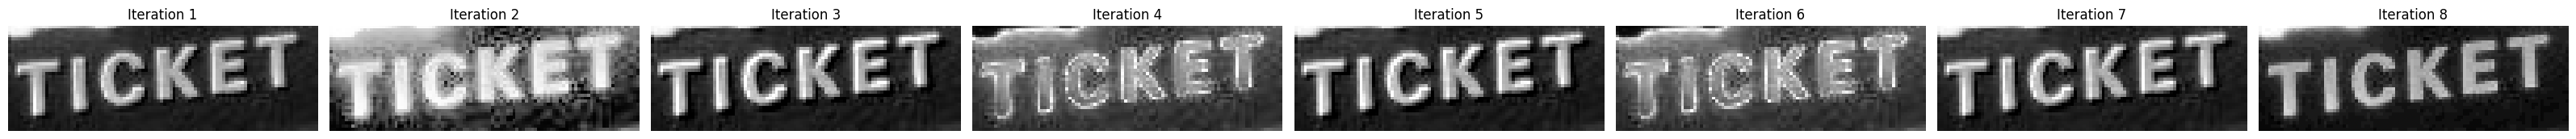

In [123]:
apply_and_plot_transformations(aug.apply_process_transformations, gray_image, iterations=8)

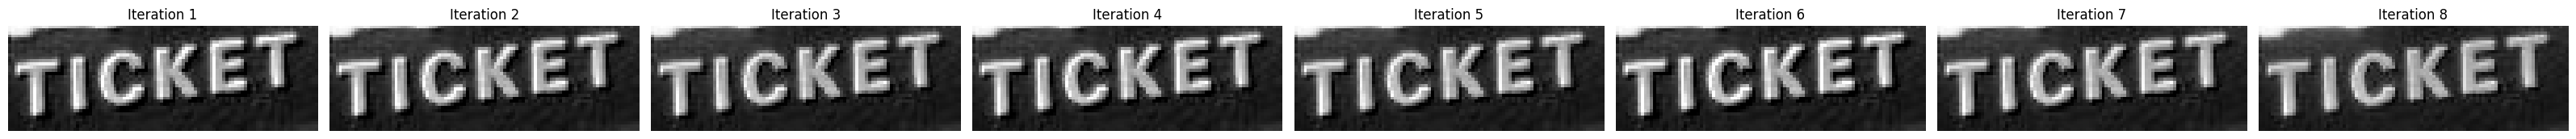

In [102]:
apply_and_plot_transformations(aug.apply_emboss_transformations, gray_image, iterations=8)

### Zoom

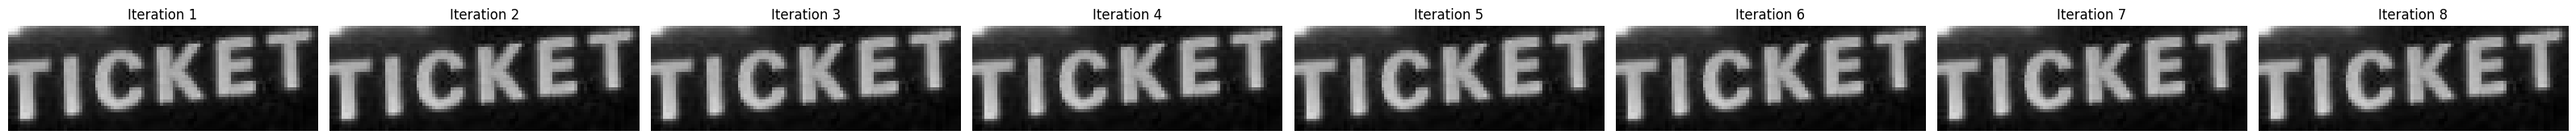

In [119]:
apply_and_plot_transformations(aug.apply_affine_transformations, gray_image, iterations=8)

# Geometric

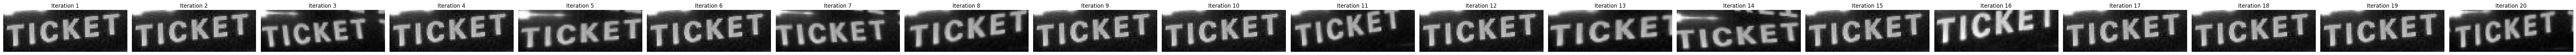

In [155]:
#Elastic
#apply_and_plot_transformations(aug.apply_geometric_transformations, gray_image, iterations=20)

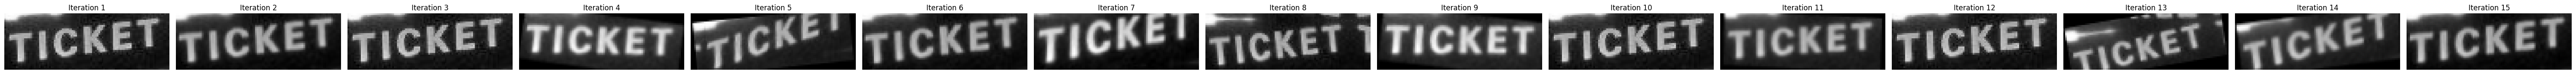

In [161]:
apply_and_plot_transformations(aug.apply_geometric_transformations, gray_image, iterations=15)